In [1]:
# 📚 Libraries 
import kagglehub
import pandas as pd
import numpy as np
import os

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as g

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

In [2]:
# Download latest version
#path = kagglehub.dataset_download("andrewmvd/sp-500-stocks")


In [ ]:
# Print all files in the dataset path
#print(os.listdir(path))

In [4]:
#csv_file_path = os.path.join(path, 'sp500_stocks.csv')
#csv_file_path2 = os.path.join(path, 'sp500_companies.csv')
#csv_file_path3 = os.path.join(path, 'sp500_index.csv')
#data = pd.read_csv(csv_file_path)
#df = pd.read_csv(csv_file_path2)
#sp = pd.read_csv(csv_file_path3)

In [2]:
data = pd.read_csv('sp500_stocks.csv')
df = pd.read_csv('sp500_companies.csv')
sp = pd.read_csv('sp500_index.csv')

In [3]:
data.columns = [col.lower().replace(" ", "_")for col in data.columns] #snake_case
df.columns = [col.lower().replace(" ", "_")for col in df.columns] #snake_case
sp.columns = [col.lower().replace(" ", "_")for col in sp.columns] #snake_case

In [4]:
# Copies 
data2 = data.copy()
df2 = df.copy()
sp2 = sp.copy()

In [5]:
data2.dtypes

date          object
symbol        object
adj_close    float64
close        float64
high         float64
low          float64
open         float64
volume       float64
dtype: object

In [6]:
data.isna().sum()

date              0
symbol            0
adj_close    101626
close        101626
high         101626
low          101626
open         101626
volume       101626
dtype: int64

In [7]:
# Delete Columns 
data2.drop(columns=['high', 'low', 'open','close'], inplace=True)

In [8]:
data2.isna().sum()

date              0
symbol            0
adj_close    101626
volume       101626
dtype: int64

In [9]:
# Delete NaN. TELL WHY I'M dropping 
data2.dropna(how='any', inplace=True)

In [10]:
data2.isna().sum()

date         0
symbol       0
adj_close    0
volume       0
dtype: int64

In [11]:
# Change to datetime. 
data2['date'] = pd.to_datetime(data2['date'])

In [12]:
data2['year'] = data2['date'].dt.year
data2['month'] = data2['date'].dt.month
data2['day'] = data2['date'].dt.day

In [13]:
cols = ['year', 'month', 'day', 'symbol', 'adj_close', 'volume']
data2 = data2[cols]
data2.head(3)

,year,month,day,symbol,adj_close,volume
0,2010,1,4,MMM,43.783867,3640265.0
1,2010,1,5,MMM,43.509628,3405012.0
2,2010,1,6,MMM,44.126682,6301126.0


In [14]:
# Drop rows where year is between 2010 and 2013 because SP500 for comparison we do have 2014. 
data2.drop(data2[(data2['year'] >= 2010) & (data2['year'] <= 2014)].index, inplace=True)

In [15]:
# Chat helped. 
annual_returns = data2.groupby(['symbol', 'year']).apply(lambda group: (group['adj_close'].iloc[-1] / group['adj_close'].iloc[0]) - 1).reset_index(name='annual_return').round(4)

/var/folders/bs/hzz4qdm57z9cct0t_9rdynfr0000gn/T/ipykernel_6818/292607746.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  annual_returns = data2.groupby(['symbol', 'year']).apply(lambda group: (group['adj_close'].iloc[-1] / group['adj_close'].iloc[0]) - 1).reset_index(name='annual_return').round(4)


In [16]:
pivoted_df = annual_returns.pivot(index='symbol', columns='year', values='annual_return')
pivoted_df.sample(3)

year,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
symbol,,,,,,,,,,
CTRA,-0.4105,0.3329,0.2889,-0.2189,-0.2475,-0.0333,0.2112,0.3731,0.1509,0.0025
FITB,0.0208,0.4173,0.1468,-0.2055,0.3146,-0.0628,0.6224,-0.2655,0.0567,0.3574
VLTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0585,0.3185


In [17]:
pivoted_df = pivoted_df.rename(columns={2015: 'ar_2015',2016:'ar_2016',2017: 'ar_2017', 
                                          2018:'ar_2018', 2019: 'ar_2019',2020: 'ar_2020', 2021: 'ar_2021', 2022:'ar_2022', 2023:'ar_2023',2024: 'ar_2024'})

In [18]:
cols = ['exchange', 'symbol', 'shortname','longname','sector','industry',
        'marketcap','ebitda', 'revenuegrowth', 'city', 'state', 'country',   
        'fulltimeemployees', 'longbusinesssummary', 'weight', 'mean_2015', 'mean_2016', 'mean_2017', 'mean_2018', 'mean_2019',
        'mean_2020', 'mean_2021', 'mean_2022', 'mean_2023', 'mean_2024', 'currentprice']

In [19]:
defi = pd.merge (df, pivoted_df, on='symbol')
defi

,exchange,symbol,shortname,longname,sector,industry,currentprice,marketcap,ebitda,revenuegrowth,...,ar_2015,ar_2016,ar_2017,ar_2018,ar_2019,ar_2020,ar_2021,ar_2022,ar_2023,ar_2024
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,242.84,3670720643072,1.346610e+11,0.061,...,-0.0208,0.1238,0.4804,-0.0705,0.8874,0.7824,0.3806,-0.2820,0.5480,0.3145
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,142.44,3488355713024,6.118400e+10,1.224,...,0.6645,2.3292,0.9043,-0.3285,0.7341,1.1802,1.2448,-0.5144,2.4610,1.9580
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,443.57,3297889746944,1.365520e+11,0.160,...,0.2188,0.1651,0.3974,0.2022,0.5826,0.3994,0.5579,-0.2769,0.5835,0.2050
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,227.03,2387220627456,1.115830e+11,0.110,...,1.1907,0.1772,0.5517,0.2632,0.2006,0.7160,0.0464,-0.5071,0.7704,0.5142
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,176.49,2149065949184,1.234700e+11,0.151,...,0.4500,0.0404,0.3311,-0.0276,0.2784,0.2812,0.6743,-0.3884,0.5711,0.2646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,NYQ,BWA,BorgWarner Inc.,BorgWarner Inc.,Consumer Cyclical,Auto Parts,33.80,7392059904,1.882000e+09,-0.048,...,-0.2022,-0.0517,0.2918,-0.3189,0.2572,-0.1037,0.2019,-0.0940,0.0245,-0.0471
499,NYQ,HII,"Huntington Ingalls Industries,","Huntington Ingalls Industries, Inc.",Industrials,Aerospace & Defense,187.95,7354351616,1.071000e+09,-0.024,...,0.1491,0.5029,0.2615,-0.1545,0.3244,-0.3181,0.1651,0.2680,0.1633,-0.2620
500,NYQ,FMC,FMC Corporation,FMC Corporation,Basic Materials,Agricultural Inputs,56.58,7063221248,7.033000e+08,0.085,...,-0.3028,0.5106,0.6741,-0.2186,0.5627,0.1725,-0.0103,0.1542,-0.4807,-0.1023
501,NMS,QRVO,"Qorvo, Inc.","Qorvo, Inc.",Technology,Semiconductors,68.33,6459010048,6.731300e+08,-0.052,...,-0.2770,0.0396,0.2590,-0.1183,0.8998,0.4339,-0.0498,-0.4315,0.2633,-0.3726


In [20]:
cols = ['exchange', 'symbol', 'shortname','longname','sector','industry',
        'marketcap','ebitda', 'revenuegrowth', 'city', 'state', 'country',   
        'fulltimeemployees', 'longbusinesssummary', 'weight', 'ar_2015', 'ar_2016', 'ar_2017', 'ar_2018', 'ar_2019',
        'ar_2020', 'ar_2021', 'ar_2022', 'ar_2023', 'ar_2024', 'currentprice']

In [21]:
defi = defi[cols]

In [22]:
cat = defi.select_dtypes(exclude='number')
cat.head(5)

,exchange,symbol,shortname,longname,sector,industry,city,state,country,longbusinesssummary
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,Cupertino,CA,United States,"Apple Inc. designs, manufactures, and markets ..."
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,Santa Clara,CA,United States,NVIDIA Corporation provides graphics and compu...
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,Redmond,WA,United States,Microsoft Corporation develops and supports so...
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,Seattle,WA,United States,"Amazon.com, Inc. engages in the retail sale of..."
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,Mountain View,CA,United States,Alphabet Inc. offers various products and plat...


In [23]:
num = defi.select_dtypes(include='number')
num.head(5)

,marketcap,ebitda,revenuegrowth,fulltimeemployees,weight,ar_2015,ar_2016,ar_2017,ar_2018,ar_2019,ar_2020,ar_2021,ar_2022,ar_2023,ar_2024,currentprice
0,3670720643072,1.346610e+11,0.061,164000.0,0.064589,-0.0208,0.1238,0.4804,-0.0705,0.8874,0.7824,0.3806,-0.2820,0.5480,0.3145,242.84
1,3488355713024,6.118400e+10,1.224,29600.0,0.061381,0.6645,2.3292,0.9043,-0.3285,0.7341,1.1802,1.2448,-0.5144,2.4610,1.9580,142.44
2,3297889746944,1.365520e+11,0.160,228000.0,0.058029,0.2188,0.1651,0.3974,0.2022,0.5826,0.3994,0.5579,-0.2769,0.5835,0.2050,443.57
3,2387220627456,1.115830e+11,0.110,1551000.0,0.042005,1.1907,0.1772,0.5517,0.2632,0.2006,0.7160,0.0464,-0.5071,0.7704,0.5142,227.03
4,2149065949184,1.234700e+11,0.151,181269.0,0.037815,0.4500,0.0404,0.3311,-0.0276,0.2784,0.2812,0.6743,-0.3884,0.5711,0.2646,176.49


In [24]:
defi.describe()

,marketcap,ebitda,revenuegrowth,fulltimeemployees,weight,ar_2015,ar_2016,ar_2017,ar_2018,ar_2019,ar_2020,ar_2021,ar_2022,ar_2023,ar_2024,currentprice
count,5.030000e+02,4.740000e+02,500.000000,4.940000e+02,503.000000,475.000000,480.000000,482.000000,485.000000,491.000000,495.000000,495.000000,497.000000,499.000000,503.000000,503.000000
mean,1.129853e+11,7.031397e+09,0.070484,5.774496e+04,0.001988,0.045306,0.197734,0.258852,-0.034976,0.352786,0.192008,0.328778,-0.085353,0.195019,0.215239,230.293300
std,3.399129e+11,1.622777e+10,0.180071,1.394693e+05,0.005981,0.253423,0.277769,0.260448,0.225112,0.317066,0.548745,0.295113,0.279833,0.356690,0.382605,521.997583
min,5.637307e+09,-3.991000e+09,-0.602000,2.800000e+01,0.000099,-0.753000,-0.710600,-0.430800,-0.576200,-0.543300,-0.580300,-0.350500,-0.710700,-0.480700,-0.652500,8.560000
25%,2.036663e+10,1.623194e+09,0.002000,1.020000e+04,0.000358,-0.107050,0.047800,0.094325,-0.192900,0.185550,-0.051000,0.131250,-0.266900,-0.028700,0.004500,71.545000
50%,3.803281e+10,2.941705e+09,0.050000,2.159500e+04,0.000669,0.040700,0.177950,0.223250,-0.037800,0.328700,0.123900,0.306900,-0.114600,0.127500,0.167400,126.820000
75%,8.419720e+10,6.017250e+09,0.109000,5.476225e+04,0.001482,0.177300,0.310375,0.386175,0.093100,0.478200,0.302250,0.472350,0.057700,0.324050,0.371450,239.190000
max,3.670721e+12,1.495470e+11,1.632000,2.100000e+06,0.064589,1.722800,3.093900,1.427200,1.065900,4.311000,7.200500,1.900200,1.071300,2.461000,3.604300,8946.330000


In [25]:
frequ = cat.sector.value_counts()
table = cat.sector.value_counts(normalize=True).round(2)

In [26]:
freq_table = pd.concat([frequ,table], axis = 1)
freq_table

,count,proportion
sector,,
Technology,82,0.16
Industrials,70,0.14
Financial Services,67,0.13
Healthcare,63,0.13
Consumer Cyclical,55,0.11
Consumer Defensive,37,0.07
Utilities,32,0.06
Real Estate,31,0.06
Communication Services,22,0.04


In [28]:
# crosstab sector and industry
crosstab_result = pd.crosstab(defi['sector'], defi['industry'])
crosstab_result 

industry,Advertising Agencies,Aerospace & Defense,Agricultural Inputs,Airlines,Apparel Manufacturing,Apparel Retail,Asset Management,Auto & Truck Dealerships,Auto Manufacturers,Auto Parts,...,Tools & Accessories,Travel Services,Trucking,Utilities - Diversified,Utilities - Independent Power Producers,Utilities - Regulated Electric,Utilities - Regulated Gas,Utilities - Regulated Water,Utilities - Renewable,Waste Management
sector,,,,,,,,,,,,,,,,,,,,,
Basic Materials,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Communication Services,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Consumer Cyclical,0,0,0,0,1,3,0,1,3,4,...,0,6,0,0,0,0,0,0,0,0
Consumer Defensive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Energy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Financial Services,0,0,0,0,0,0,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Healthcare,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Industrials,0,12,0,3,0,0,0,0,0,0,...,2,0,1,0,0,0,0,0,0,2
Real Estate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
tech = defi[defi['sector'] == 'Technology']
indu = defi[defi['sector'] == 'Industrials']
fin = defi[defi['sector'] == 'Financial Services']

In [37]:
tech.industry.value_counts()

industry
Software - Application                 15
Semiconductors                         14
Software - Infrastructure              14
Information Technology Services        11
Computer Hardware                       7
Communication Equipment                 5
Scientific & Technical Instruments      5
Semiconductor Equipment & Materials     4
Electronic Components                   4
Solar                                   2
Consumer Electronics                    1
Name: count, dtype: int64

In [45]:
tech[tech['industry'] == 'Software - Infrastructure']

,exchange,symbol,shortname,longname,sector,industry,marketcap,ebitda,revenuegrowth,city,...,ar_2016,ar_2017,ar_2018,ar_2019,ar_2020,ar_2021,ar_2022,ar_2023,ar_2024,currentprice
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,3297889746944,1.365520e+11,0.160,Redmond,...,0.1651,0.3974,0.2022,0.5826,0.3994,0.5579,-0.2769,0.5835,0.2050,443.57
14,NYQ,ORCL,Oracle Corporation,Oracle Corporation,Technology,Software - Infrastructure,531184484352,2.180300e+10,0.069,Austin,...,0.0877,0.2413,-0.0162,0.1916,0.2202,0.3891,-0.0666,0.2593,0.8421,191.69
31,NMS,ADBE,Adobe Inc.,Adobe Inc.,Technology,Software - Infrastructure,243413008384,8.134000e+09,0.106,San Jose,...,0.1194,0.6935,0.2732,0.4686,0.4954,0.1684,-0.4037,0.7707,-0.0467,552.96
56,NMS,PLTR,Palantir Technologies Inc.,Palantir Technologies Inc.,Technology,Software - Infrastructure,173904052224,3.977070e+08,0.300,Denver,...,NaN,NaN,NaN,NaN,1.4789,-0.2208,-0.6535,1.6870,3.6043,76.34
80,NMS,PANW,"Palo Alto Networks, Inc.","Palo Alto Networks, Inc.",Technology,Software - Infrastructure,133175787520,1.094400e+09,0.121,Santa Clara,...,-0.2709,0.1418,0.2679,0.2622,0.5097,0.5832,-0.2308,1.1299,0.4049,405.90
110,NMS,CRWD,"CrowdStrike Holdings, Inc.","CrowdStrike Holdings, Inc.",Technology,Software - Infrastructure,90063618048,1.874900e+08,0.317,Austin,...,NaN,NaN,NaN,-0.1402,3.2844,0.0212,-0.4691,1.4721,0.4810,365.65
135,NMS,SNPS,"Synopsys, Inc.","Synopsys, Inc.",Technology,Software - Infrastructure,79719063552,1.652390e+09,0.127,Sunnyvale,...,0.3103,0.4357,-0.0208,0.6562,0.8145,0.4468,-0.1158,0.6107,0.0367,517.28
140,NMS,FTNT,"Fortinet, Inc.","Fortinet, Inc.",Technology,Software - Infrastructure,76039798784,1.727900e+09,0.130,Sunnyvale,...,-0.0036,0.4505,0.5880,0.5321,0.3542,1.4691,-0.2662,0.2063,0.7170,99.21
302,NYQ,GDDY,GoDaddy Inc.,GoDaddy Inc.,Technology,Software - Infrastructure,28999165952,1.015600e+09,0.073,Tempe,...,0.0652,0.4076,0.3373,0.0812,0.2099,0.0377,-0.1146,0.4296,1.0054,206.56
329,NYQ,CPAY,"Corpay, Inc.","Corpay, Inc.",Technology,Software - Infrastructure,25497495552,2.066438e+09,0.060,Atlanta,...,0.0063,0.3303,-0.0420,0.5506,-0.0518,-0.1583,-0.2052,0.5427,0.2990,365.76


In [44]:
tech[tech['industry'] == 'Computer Hardware']

,exchange,symbol,shortname,longname,sector,industry,marketcap,ebitda,revenuegrowth,city,...,ar_2016,ar_2017,ar_2018,ar_2019,ar_2020,ar_2021,ar_2022,ar_2023,ar_2024,currentprice
78,NYQ,ANET,"Arista Networks, Inc.",Arista Networks Inc,Technology,Computer Hardware,136369020928,2.833342e+09,0.200,Santa Clara,...,0.2503,1.4272,-0.0880,-0.0340,0.4194,1.0307,-0.1469,0.9478,0.8699,108.25
121,NYQ,DELL,Dell Technologies Inc.,Dell Technologies Inc.,Technology,Computer Hardware,86458605568,8.726000e+09,0.091,Round Rock,...,0.2784,0.4895,0.0707,0.0906,0.4016,0.5288,-0.2941,0.8704,0.6500,123.40
266,NYQ,HPQ,HP Inc.,HP Inc.,Technology,Computer Hardware,35058577408,5.045000e+09,0.024,Palo Alto,...,0.3285,0.4559,-0.0166,0.0302,0.2267,0.6038,-0.2708,0.1661,0.2441,36.20
317,NMS,NTAP,"NetApp, Inc.","NetApp, Inc.",Technology,Computer Hardware,26655449088,1.582000e+09,0.076,San Jose,...,0.3924,0.5860,0.0918,0.0624,0.0917,0.4550,-0.3321,0.4933,0.5496,131.11
327,NMS,SMCI,"Super Micro Computer, Inc.","Super Micro Computer, Inc.",Technology,Computer Hardware,25723871232,1.304591e+09,1.430,San Jose,...,0.1860,-0.2643,-0.3566,0.5907,0.3398,0.4155,0.7996,2.3897,0.5390,43.93
336,NMS,WDC,Western Digital Corporation,Western Digital Corporation,Technology,Computer Hardware,24569466880,2.134000e+09,NaN,San Jose,...,0.1680,0.1727,-0.5300,0.7117,-0.1448,0.2485,-0.5215,0.6673,0.3974,71.07
369,NMS,STX,Seagate Technology Holdings PLC,Seagate Technology Holdings plc,Technology,Computer Hardware,20837820416,1.211000e+09,0.491,Singapore,...,0.1463,0.1240,-0.0537,0.6011,0.0832,0.9399,-0.5149,0.7150,0.2171,98.51


In [35]:
indu.industry.value_counts()

industry
Specialty Industrial Machinery         16
Aerospace & Defense                    12
Integrated Freight & Logistics          5
Building Products & Equipment           5
Railroads                               4
Specialty Business Services             4
Farm & Heavy Construction Machinery     3
Airlines                                3
Industrial Distribution                 3
Waste Management                        2
Engineering & Construction              2
Conglomerates                           2
Consulting Services                     2
Tools & Accessories                     2
Rental & Leasing Services               1
Trucking                                1
Pollution & Treatment Controls          1
Electrical Equipment & Parts            1
Security & Protection Services          1
Name: count, dtype: int64

In [43]:
indu[indu['industry'] == 'Railroads']

,exchange,symbol,shortname,longname,sector,industry,marketcap,ebitda,revenuegrowth,city,...,ar_2016,ar_2017,ar_2018,ar_2019,ar_2020,ar_2021,ar_2022,ar_2023,ar_2024,currentprice
75,NYQ,UNP,Union Pacific Corporation,Union Pacific Corporation,Industrials,Railroads,141603454976,1.203000e+10,0.025,Omaha,...,0.3465,0.3380,0.0396,0.3414,0.1668,0.2648,-0.1602,0.1833,-0.0405,233.57
157,NMS,CSX,CSX Corporation,CSX Corporation,Industrials,Railroads,66434068480,7.191000e+09,0.013,Jacksonville,...,0.4297,0.5565,0.1177,0.1840,0.2564,0.2964,-0.1541,0.1388,0.0087,34.45
175,NYQ,NSC,Norfolk Southern Corporation,Norfolk Southern Corporation,Industrials,Railroads,58998865920,5.888000e+09,0.027,Atlanta,...,0.3595,0.3823,0.0375,0.3239,0.2307,0.2953,-0.1404,-0.0214,0.1318,260.78
264,NYQ,WAB,Westinghouse Air Brake Technolo,Westinghouse Air Brake Technologies Corporation,Industrials,Railroads,35307925504,2.110000e+09,0.044,Pittsburgh,...,0.1892,-0.0254,-0.1483,0.1050,-0.0892,0.2749,0.0885,0.2803,0.6397,205.41


In [41]:
indu[indu['industry'] == 'Aerospace & Defense']

,exchange,symbol,shortname,longname,sector,industry,marketcap,ebitda,revenuegrowth,city,...,ar_2016,ar_2017,ar_2018,ar_2019,ar_2020,ar_2021,ar_2022,ar_2023,ar_2024,currentprice
49,NYQ,GE,GE Aerospace,GE Aerospace,Industrials,Aerospace & Defense,190028480512,8.935000e+09,0.058,Evendale,...,0.0612,-0.4308,-0.5670,0.4476,-0.0901,0.1314,-0.1256,0.9297,0.7554,175.58
62,NYQ,RTX,RTX Corporation,RTX Corporation,Industrials,Aerospace & Defense,157047046144,1.257100e+10,0.492,Arlington,...,0.1775,0.1783,-0.1505,0.4140,-0.2368,0.2881,0.1876,-0.1434,0.4170,117.99
83,NYQ,LMT,Lockheed Martin Corporation,Lockheed Martin Corporation,Industrials,Aerospace & Defense,121606078464,1.022600e+10,0.013,Bethesda,...,0.2056,0.3001,-0.1569,0.5088,-0.0883,0.0625,0.4089,-0.0251,0.1542,513.03
89,NYQ,BA,Boeing Company (The),The Boeing Company,Industrials,Aerospace & Defense,115166724096,-3.991000e+09,-0.015,Arlington,...,0.1455,0.9311,0.1078,0.0292,-0.3540,-0.0069,-0.0836,0.3340,-0.3886,153.93
141,NYQ,GD,General Dynamics Corporation,General Dynamics Corporation,Industrials,Aerospace & Defense,74736566272,5.403000e+09,0.104,Reston,...,0.2967,0.1795,-0.2018,0.1476,-0.1415,0.4661,0.2228,0.0691,0.0723,271.80
145,NYQ,TDG,Transdigm Group Incorporated,TransDigm Group Incorporated,Industrials,Aerospace & Defense,71930486784,3.888000e+09,0.180,Cleveland,...,0.1840,0.1909,0.2361,0.8463,0.0906,0.0827,0.0093,0.6760,0.3612,1279.21
154,NYQ,NOC,Northrop Grumman Corporation,Northrop Grumman Corporation,Industrials,Aerospace & Defense,69008441344,4.458000e+09,0.023,Falls Church,...,0.2607,0.3257,-0.1851,0.4184,-0.1289,0.3366,0.4209,-0.1336,0.0076,473.65
193,NMS,AXON,"Axon Enterprise, Inc.","Axon Enterprise, Inc.",Industrials,Aerospace & Defense,52439662592,1.832200e+08,0.317,Scottsdale,...,0.4403,0.0781,0.6478,0.6245,0.6004,0.3436,0.0854,0.5355,1.7329,687.69
206,NYQ,HWM,Howmet Aerospace Inc.,Howmet Aerospace Inc.,Industrials,Aerospace & Defense,48064737280,1.772000e+09,0.107,Pittsburgh,...,-0.0150,0.4338,-0.3858,0.6673,-0.0945,0.1861,0.2224,0.3908,1.2087,118.31
220,NYQ,LHX,"L3Harris Technologies, Inc.","L3Harris Technologies, Inc.",Industrials,Aerospace & Defense,44503699456,3.706000e+09,0.077,Melbourne,...,0.1967,0.4046,-0.0366,0.5090,-0.0536,0.2045,0.0030,0.0431,0.1414,234.64


In [42]:
indu[indu['industry'] == 'Integrated Freight & Logistics']

,exchange,symbol,shortname,longname,sector,industry,marketcap,ebitda,revenuegrowth,city,...,ar_2016,ar_2017,ar_2018,ar_2019,ar_2020,ar_2021,ar_2022,ar_2023,ar_2024,currentprice
97,NYQ,UPS,"United Parcel Service, Inc.","United Parcel Service, Inc.",Industrials,Integrated Freight & Logistics,107191803904,1.200800e+10,0.056,Atlanta,...,0.2452,0.0673,-0.1857,0.2465,0.4899,0.3367,-0.1798,-0.1030,-0.2067,125.61
155,NYQ,FDX,FedEx Corporation,FedEx Corporation,Industrials,Integrated Freight & Logistics,68576579584,1.088500e+10,0.139,Memphis,...,0.3096,0.3413,-0.3672,-0.0586,0.6990,0.0328,-0.3161,0.4570,0.1300,280.68
399,NMS,JBHT,"J.B. Hunt Transport Services, I","J.B. Hunt Transport Services, Inc.",Industrials,Integrated Freight & Logistics,18249222144,1.577557e+09,-0.030,Lowell,...,0.3760,0.1997,-0.1919,0.2650,0.1737,0.5216,-0.1361,0.1572,-0.0742,180.99
420,NYQ,EXPD,Expeditors International of Was,"Expeditors International of Washington, Inc.",Industrials,Integrated Freight & Logistics,16696337408,1.006917e+09,0.370,Seattle,...,0.2156,0.2361,0.0604,0.1752,0.2295,0.4683,-0.1959,0.2260,-0.0500,119.28
458,NMS,CHRW,"C.H. Robinson Worldwide, Inc.","C.H. Robinson Worldwide, Inc.",Industrials,Integrated Freight & Logistics,12462353408,6.739970e+08,0.070,Eden Prairie,...,0.2144,0.2526,-0.0433,-0.0343,0.2354,0.1975,-0.1331,-0.0173,0.2361,105.43


In [46]:
# crosstab MSZoning and SaleCondition
crosstab_result = pd.crosstab(defi['sector'], defi['industry'])
crosstab_result 

industry,Advertising Agencies,Aerospace & Defense,Agricultural Inputs,Airlines,Apparel Manufacturing,Apparel Retail,Asset Management,Auto & Truck Dealerships,Auto Manufacturers,Auto Parts,...,Tools & Accessories,Travel Services,Trucking,Utilities - Diversified,Utilities - Independent Power Producers,Utilities - Regulated Electric,Utilities - Regulated Gas,Utilities - Regulated Water,Utilities - Renewable,Waste Management
sector,,,,,,,,,,,,,,,,,,,,,
Basic Materials,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Communication Services,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Consumer Cyclical,0,0,0,0,1,3,0,1,3,4,...,0,6,0,0,0,0,0,0,0,0
Consumer Defensive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Energy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Financial Services,0,0,0,0,0,0,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Healthcare,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Industrials,0,12,0,3,0,0,0,0,0,0,...,2,0,1,0,0,0,0,0,0,2
Real Estate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


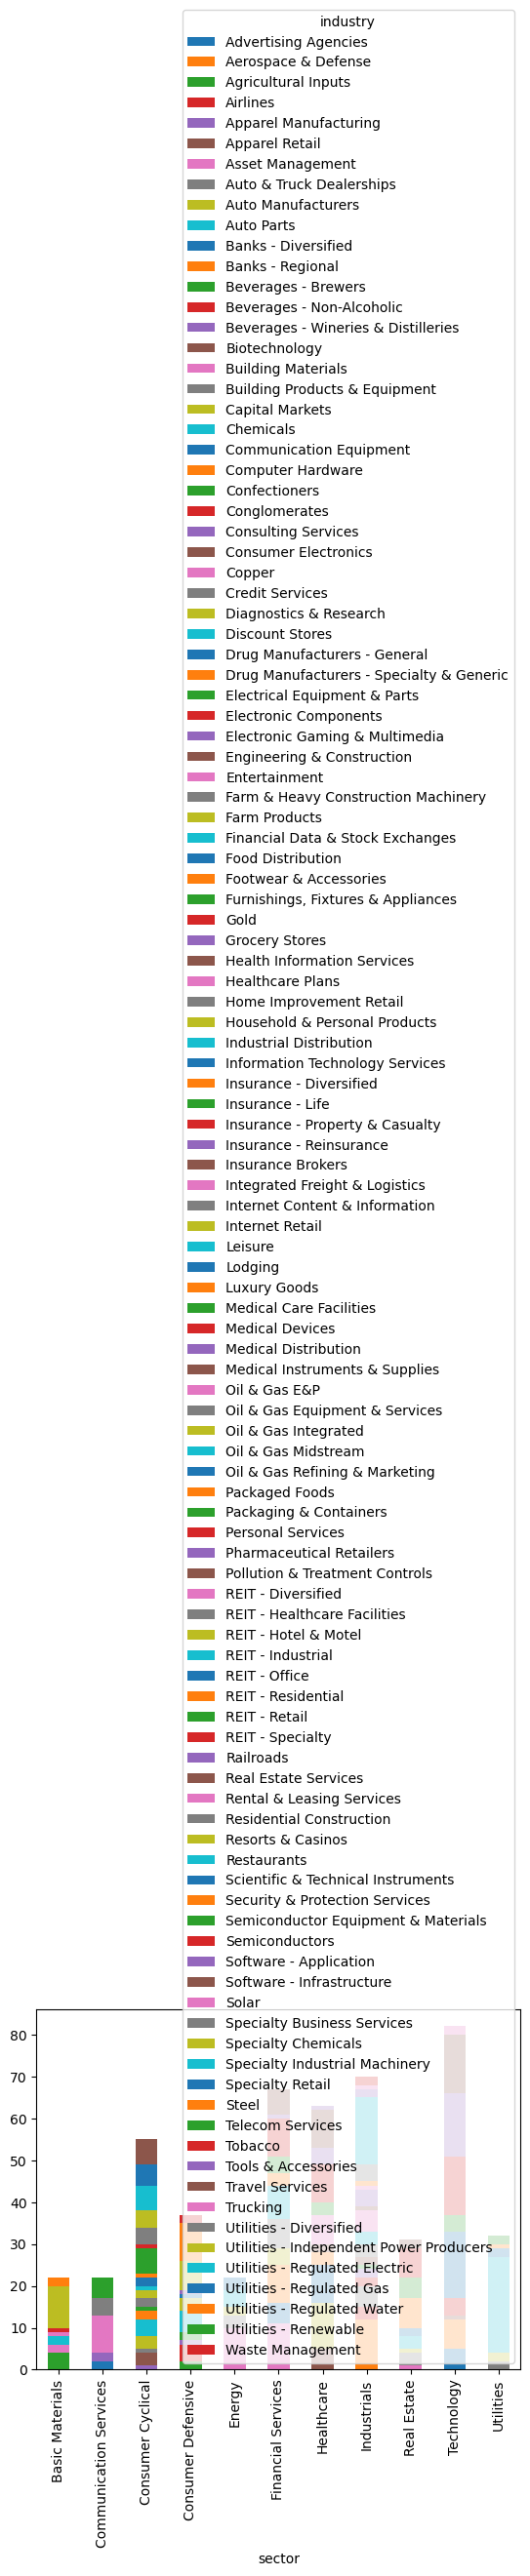

In [47]:
crosstab_result.plot(kind='bar', stacked=True)
plt.show()

In [36]:
fin.industry.value_counts()

industry
Asset Management                    11
Insurance - Property & Casualty      9
Banks - Regional                     9
Financial Data & Stock Exchanges     8
Credit Services                      7
Insurance Brokers                    6
Banks - Diversified                  5
Capital Markets                      4
Insurance - Life                     4
Insurance - Diversified              3
Insurance - Reinsurance              1
Name: count, dtype: int64

In [ ]:
color = '#9370DB'

nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

In [ ]:
# Without the filter 650.000 and taking out the outliers. 
sns.histplot(df["currentprice"], color=color, kde=True);

In [ ]:
#Pearson 
num.corrwith(defi['currentprice'])

In [ ]:
#Spearman
num.corrwith(defi['currentprice'], method='spearman').sort_values(ascending=False)[:5]

In [ ]:
color = '#9370DB'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [ ]:
num_corr = num.corr()
num_corr

In [ ]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True 
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5)

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="BuPu", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation Heatmap", fontsize=20) 

In [ ]:
# Plotting scatter plots for each numerical column against 'currentprice' to visualize their relationships
for col in num.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of price vs ' + col)
    sns.scatterplot(data=defi, x=col, y='currentprice')
    plt.show()

In [37]:
def outlier_slayer(data): 
    """
    Automatically removes outliers based on Q1, Q3
    """
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [38]:
definitive = outlier_slayer(defi)

In [ ]:
cat = definitive.select_dtypes(exclude='number')
cat.head(5)

In [ ]:
num = definitive.select_dtypes(include='number')
num.head(5)

In [ ]:
color = '#9370DB'

nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

In [ ]:
# Dealing with outliers. 
sns.histplot(definitive["currentprice"], color=color, kde=True);

In [ ]:
# Without dealing with outliers. 
sns.histplot(defi["currentprice"], color=color, kde=True);

In [ ]:
# Without dealing with outliers. REVENUE
sns.histplot(defi["revenuegrowth"], color=color, kde=True);

In [ ]:
# Dealing with outliers. REVENUE
sns.histplot(definitive["revenuegrowth"], color=color, kde=True);

In [ ]:
#pearson 
num.corrwith(definitive['currentprice']).sort_values(ascending=False)

In [ ]:
#Spearman
num.corrwith(df['currentprice'], method='spearman').sort_values(ascending=False)[:5]

In [ ]:
#pearson 
num.corrwith(definitive['revenuegrowth']).sort_values(ascending=False)

In [ ]:
#Spearman
num.corrwith(df['revenuegrowth'], method='spearman').sort_values(ascending=False)[:5]

In [ ]:
color = '#9370DB'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [ ]:
num_corr = num.corr()
num_corr

In [ ]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True 
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5)

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="BuPu", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation Heatmap", fontsize=20) 

In [ ]:
# Plotting scatter plots for each numerical column against 'currentprice' to visualize their relationships
for col in num.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of price vs ' + col)
    sns.scatterplot(data=definitive, x=col, y='currentprice')
    plt.show()

In [ ]:
defi

In [ ]:
# crosstab MSZoning and SaleCondition
crosstab_result = pd.crosstab(df['MSZoning'], df['SaleCondition'])
crosstab_result 